In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
filename='lab_4_Ribberink_Deere_Macadam_Ng_Schmidt_Ayem_Lab4.csv'
headers=['time','batV','waterT','airT','calibrate']
dtypes = ['datetime', 'float','float','float','float']
df = pd.read_csv(filename,names=headers, usecols = [0,2,3,4,5],header=3)
df.purpleV=(df.calibrate/1000)
df.head()

c:\users\pearl\miniconda3\envs\e350\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,time,batV,waterT,airT,calibrate
0,2020-01-31 11:44:43.1,13.17,23.11,23.96,0.03
1,2020-01-31 11:44:43.2,13.18,23.11,23.95,0.03
2,2020-01-31 11:44:43.3,13.17,23.12,23.97,0.03
3,2020-01-31 11:44:43.4,13.17,23.12,23.97,0.03
4,2020-01-31 11:44:43.5,13.17,23.11,23.96,0.03


In [3]:
df = df.set_index('time')
df['Tdiff']=df['waterT']-df['airT']
# df['Tdiff']=df['airT']-df['waterT']

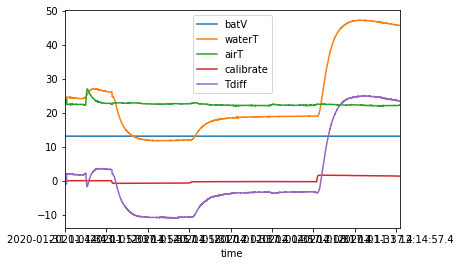

In [4]:
df.plot()

In [5]:
time_coldT = df['2020-01-31 11:56:00': '2020-01-31 11:58:00']
time_roomT=df['2020-01-31 12:06:00': '2020-01-31 12:08:00']
time_hotT=df['2020-01-31 12:12:00': '2020-01-31 12:14:00']
# all_times=[time_coldT,time_roomT,time_hotT]
# df_clean=pd.concat(all_times)

In [8]:
def plot_temps(dfs,titles):
    i=0
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15))
    fig.subplots_adjust(hspace=.5)
    
    
    for df in dfs:
        x = df.Tdiff
        y = df.calibrate
        stats = linregress(x, y)
        m = stats.slope
        b = stats.intercept     

        # Change the default marker for the scatter from circles to x's
        ax[i].scatter(x, y, marker='.',color='#003F72')

        # Set the linewidth on the regression line to 3px
        ax[i].plot(x, m * x + b, color="red", linewidth=2)

        # Add x and y lables, and set their font size
        ax[i].set_xlabel("Difference in Temp ($^\circ$C)")
        ax[i].set_ylabel("Voltage (V)")
        ax[i].set_title(titles[i])
        
        s= 'Voltage= ' + str(round(m,4)) + '* $\Delta$ T + ' + str(round(m,3))  
#         
        ax[i].grid(True)
#         print(max(y))
        ax[i].text(min(x),max(y),s)
        
        i+=1
#         plt.show()
    
    return None


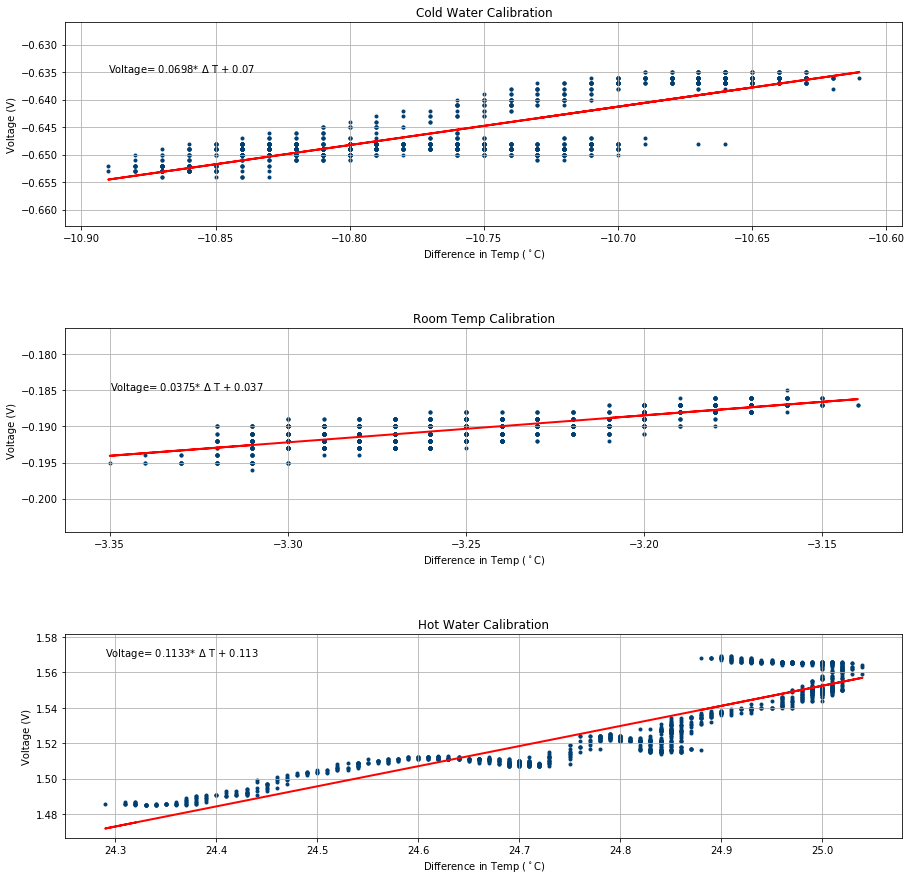

In [9]:
plot_temps([time_coldT,time_roomT,time_hotT],['Cold Water Calibration',
                                              'Room Temp Calibration',
                                              'Hot Water Calibration'])